<a href="https://colab.research.google.com/github/Sankytanky100/Data_Science-Projects/blob/main/Air_Quality_Using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Evaluating the Impact of Cover Crops on Farm Yield Using Propensity Score Weighting and Regression Analysis**

In [41]:
!pip install rpy2


In [42]:
!apt-get install -y r-base

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [43]:
%load_ext rpy2.ipython



The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [56]:
%%R
install.packages("cobalt")
library(cobalt)
install.packages("WeightIt")
library(WeightIt)
install.packages("lmtest")
library(lmtest)
install.packages("sandwich")
library(sandwich)
install.packages("rddtools", dependencies = TRUE)
library(rddtools)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpV8oAC8/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpV8oAC8/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpV8oAC8/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpV8oAC8/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpV8oAC8/downloaded_packages’



In [45]:
from google.colab import files
uploaded = files.upload()


Saving air_data.csv to air_data (2).csv


In [55]:
%%R

# Load ggplot2 library
library(ggplot2)

# Import dataset
air_data <- read.csv("air_data.csv")

head(air_data)


  id    watts            group      aqi
1  1 603.7698 Emissions Device 110.0132
2  2 546.2823        No Device 152.8377
3  3 534.8220        No Device 144.6049
4  4 641.5463 Emissions Device 111.7767
5  5 531.4000        No Device 139.7165
6  6 625.7948 Emissions Device 111.1061


In [47]:
%%R
# Create scatter plot with watts as forcing variable and AQI as outcome
air_scatter <- ggplot(air_data, aes(x = watts, y = aqi)) +
  geom_point() +
  labs(
    title = "Scatter Plot: Watts vs AQI",
    x = "Watts (forcing variable)",
    y = "AQI (outcome)"
  )


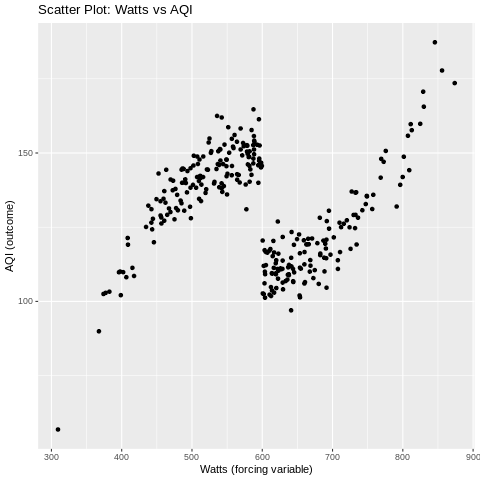

In [48]:
%%R
# Print the scatter plot
print(air_scatter)


In [49]:
%%R
# Add best-fit lines to the scatter plot
air_scatter2 <- air_scatter +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(
    title = "Scatter Plot with Best-Fit Line: Watts vs AQI"
  )


`geom_smooth()` using formula = 'y ~ x'


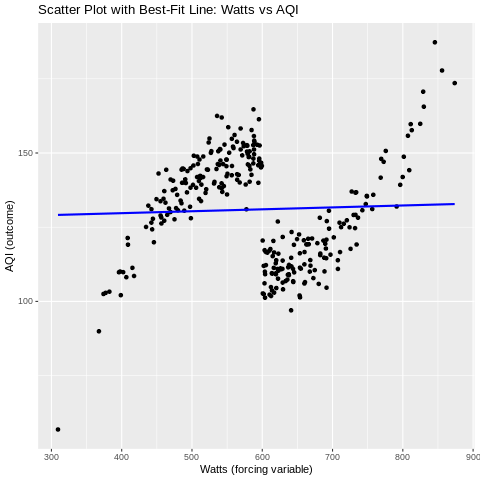

In [50]:
%%R
# Print the scatter plot with best-fit line
print(air_scatter2)


In [57]:
%%R
# Calculate the IK bandwidth
air_ik_bw <- IKbandwidth(
  X = air_data$watts, # forcing variable
  Y = air_data$aqi,   # outcome variable
  cutpoint = 600      # cutpoint
)


  could not find function "IKbandwidth"




Error in IKbandwidth(X = air_data$watts, Y = air_data$aqi, cutpoint = 600) : 
  could not find function "IKbandwidth"


In [58]:
%%R
# Fit local linear regression model
air_rdd <- RDestimate(
  formula = aqi ~ watts,  # formula for outcome model
  data = air_data,        # dataset
  cutpoint = 600,         # cutpoint
  bw = air_ik_bw          # bandwidth
)


  could not find function "RDestimate"




Error in RDestimate(formula = aqi ~ watts, data = air_data, cutpoint = 600,  : 
  could not find function "RDestimate"


In [53]:
%%R
# Print results of local linear regression
print(air_rdd)


  object 'air_rdd' not found




Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : 
  object 'air_rdd' not found
